# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

# Reuben's Code 

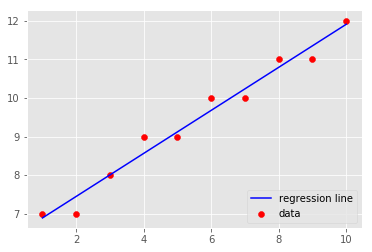

In [74]:
m_hat = (X.mean()*Y.mean()-(X*Y).mean())/(((X.mean())**2)-(X**2).mean())
c_hat = Y.mean() - m_hat*X.mean()
y_hat = (m_hat*X) + c_hat
RSS = np.sum((Y-y_hat)**2)
TSS = np.sum((Y-Y.mean())**2)
r_squared = 1-RSS/TSS
X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)
plt.scatter(X,Y,color='red',label='data')
plt.plot(X, y_hat, label='regression line', color='blue')
plt.legend(loc=4)
plt.show();

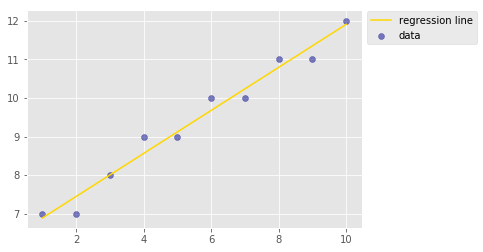

In [44]:
X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)
plot_regression(X,Y)

# My Code

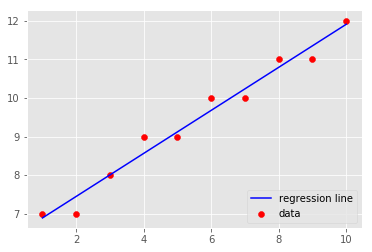

In [72]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
# Combine all the functions created so far to run a complete regression experiment. 
def calc_slope(xs,ys):
    slope = ((np.mean(xs)*np.mean(ys))-np.mean(xs*ys))/((np.mean(xs)**2)-((np.mean(xs**2))))
    return slope

def best_fit(xs,ys):
    m = calc_slope(xs,ys)
    c = np.mean(ys) - (m*np.mean(xs))
    return m,c

def reg_line (m, c, xs):
    y = [(m*x)+c for x in xs]
    return y

def sq_err(Y, Y_pred):
    sqr = 0
    for i in range(0, len(Y)):
        sqr += (Y[i]-Y_pred[i])**2
    return round(sqr,2)

def r_squared(y_real, y_predicted):
    return round(r2_score(y_real, y_predicted),2)
# Produce an output similar to the one shown below. 

def plot_reg(X,Y,Y_pred):
    plt.scatter(X,Y,color='red',label='data')
    plt.plot(X, Y_pred, label='regression line', color='blue')
    plt.legend(loc=4)
    plt.show()
    return None

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

m, c = best_fit(X,Y)
Y_pred = reg_line(m, c, X)
r_squared = r_squared(Y,Y_pred)

# print ('Basic Regression Diagnostics')
# print ('----------------------------')
# print ('Slope:', round(m,2))
# print ('Y-Intercept:', round(c,2))
# print ('R-Squared:', round(r_squared,2))
# print ('----------------------------')
# print ('Model: Y =',round(m,2),'* X +', round(c,2))

plot_reg(X,Y,Y_pred)


Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


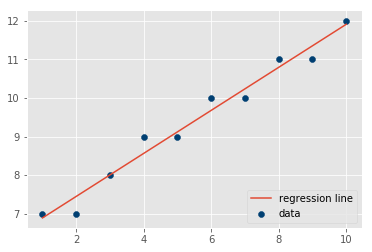

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

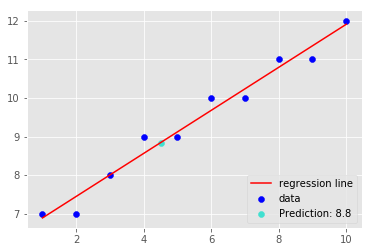

In [21]:
# Make prediction for x = 4.5 and visualize on the scatter plot
x_new = 4.5
y_new = (m*x_new)+c
y_new

plt.scatter(X,Y,color='blue',label='data')
plt.plot(X, Y_pred, label='regression line', color='red')
plt.scatter(x_new,y_new,color='turquoise',label='Prediction: '+ str(np.round(y_new,1)))
plt.legend(loc=4)
plt.show()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

In [1]:
import pandas as pd
hw = pd.read_csv('heightWeight.csv')
hw

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192
5,58,125
6,72,195
7,73,205
8,58,115
9,74,210


# One way of doing this (the hard way)

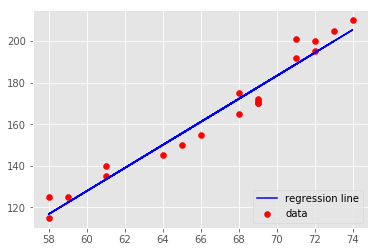

In [71]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
# Combine all the functions created so far to run a complete regression experiment. 
def calc_slope(xs,ys):
    slope = ((np.mean(xs)*np.mean(ys))-np.mean(xs*ys))/((np.mean(xs)**2)-((np.mean(xs**2))))
    return slope

def best_fit(xs,ys):
    m = calc_slope(xs,ys)
    c = np.mean(ys) - (m*np.mean(xs))
    return m,c

def reg_line (m, c, xs):
    y = (m*xs)+c
    return y

def sq_err(Y, Y_pred):
    sqr = 0
    for i in range(0, len(Y)):
        sqr += (Y[i]-Y_pred[i])**2
    return round(sqr,2)

def r_squared(y_real, y_predicted):
    return round(r2_score(y_real, y_predicted),2)
# Produce an output similar to the one shown below. 

def plot_reg(X,Y,Y_pred):
    plt.scatter(X,Y,color='red',label='data')
    plt.plot(X, Y_pred, label='regression line', color='blue')
    plt.legend(loc=4)
    plt.show()
    return None

X = hw.height
Y = hw.weight

m, c = best_fit(X,Y)
Y_pred = reg_line(m, c, X)
r_squared = r_squared(Y,Y_pred)

plot_reg(X,Y,Y_pred)

# The easier way of doing this

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
def plot_regression(X,Y):
    m_hat = (X.mean()*Y.mean()-(X*Y).mean())/(((X.mean())**2)-(X**2).mean())
    c_hat = Y.mean() - m_hat*X.mean()
    y_hat = (m_hat*X) + c_hat
    RSS = np.sum((Y-y_hat)**2)
    TSS = np.sum((Y-Y.mean())**2)
    r_squared = 1-RSS/TSS
    plt.scatter(X,Y,color='darkblue',label='data', alpha=.5)
    plt.plot(X, y_hat, label='regression line', color='gold')
    plt.legend(loc=6, bbox_to_anchor=(1, .92))
    plt.show()
    return None

# Using a pandas dataframe along with my function

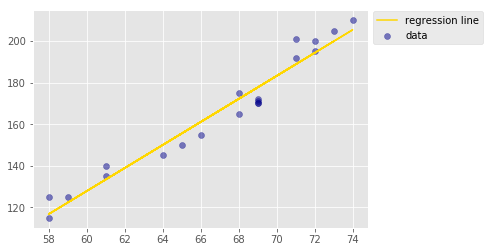

In [37]:
plot_regression(hw.height, hw.weight)

# Using a list along with my function

In [39]:
heights = []
for i,height in hw.iterrows():
    heights.append(height['height'])
heights

[68,
 71,
 61,
 69,
 71,
 58,
 72,
 73,
 58,
 74,
 61,
 59,
 69,
 68,
 64,
 69,
 72,
 66,
 65,
 69]

In [41]:
weights = []
for i,weight in hw.iterrows():
    weights.append(weight['weight'])
weights

[165,
 201,
 140,
 170,
 192,
 125,
 195,
 205,
 115,
 210,
 135,
 125,
 172,
 175,
 145,
 170,
 200,
 155,
 150,
 171]

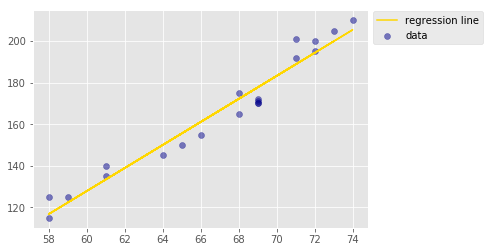

In [46]:
H = np.array(heights, dtype=np.float64)
W = np.array(weights, dtype=np.float64)
plot_regression(H,W)

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 